![MAP1.png](https://drive.google.com/uc?export=view&id=1tEg5QHSGv9xR7ZxYcMFRutH6dKaVFbyR)


# **Herramientas para la computación científica**

En este tutorial aprenderá a utilizar herramientas básicas para la computación científica. Existen muchos paquetes que proveen librerías con propósitos espécificos, una de las más conocidas es el entorno SciPy. 

Scipy (pronunciado "Sigh Pie") es un ecosistemas open-source para matemática, ciencia e ingeniería. Los paquetes que utilizaremos son los siguientes:

- NumPy
- Matplotlib
- SciPy library


Puede ejecutar los notebooks localmente instatalando las librerías necesarias o abrirlo en google colab con el botón de abajo.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ivan-jgr/computacion-cientifica/blob/main/Laboratorios/Laboratorio-1.ipynb)

## **Preliminares**

Python incluye listas (`list`), diccionarios (`dict`), conjuntos (`sets`) y tuplas (`tuples`).

- ### Listas
Una lista es el equivalente en python de una arreglo, pero se puede cambiar de tamaño y puede contener elementos de diferentes tipos:

In [ ]:
xs = [1, 2, 3] # Crear una lista
print(xs, xs[2]) # Imprime "[1, 2, 3] 3"
print(xs[-1]) # Los índices negativos se cuentan a partir del final de la lista; Imprime 3
xs[2] = 'mate6' # Las listas pueden contener elementos de diferentes tipos
print(xs) # Imprime "[1, 2, 'mate6']"
xs.append('ug') # Agrega un elemento al final de la lista
print(xs) # Imprime "[1, 2, 'mate6', 'ug']"
x = xs.pop() # Remueve el último elemento de la lista
print(x, xs)

Puede encontar más detalles sobre las listas [en la documentación](https://docs.python.org/3.5/tutorial/datastructures.html#more-on-lists).

**Slicing**: Además de acceder a los elementos de la lista de uno en uno python proporciona una sintaxis concisa para acceder a las sublistas: esto se conoce como slicing:

In [ ]:
nums = list(range(5)) # range es una función que crea una lista de enteros
print(nums) # Imprime "[0, 1, 2, 3, 4]"
print(nums[2:4]) # Obtenemos la sublista desde el índice 2 hasta el indice 4 (sin incluirlo); Imprime "[2, 3]"
print(nums[2:]) # Obtenemos una sublista desde el índice 2 hasta el final del arreglo; Imprime "[2, 3, 4]"
print(nums[:2]) # Obtenemos una sublista desde el inicio del arreglo hasta el índice 2 (sin incluirlo); Imprime "[0, 1]"
print(nums[:]) # Obtenemos todos los elementos de la lista; Imprime "[0, 1, 2, 3, 4]"
print(nums[:-1]) # Los índices para el slicing pueden ser negativos; Imprime "[0, 1, 2, 3]"
nums[2:4] = [8, 9] # Asignamos una nueva sublista a un slice
print(nums) # Imprime "[0, 1, 8, 9, 4]"

Usaremos slicing en el contexto de los arreglos de numpy.

**Loops**: puede iterar sobre los elementos de una lista de la siguiente forma:

In [ ]:
mathematicians = ['Gauss', 'Riemann', 'Cauchy']

for mathematician in mathematicians:
    print(mathematician)

Puede acceder al índice de cada elemento usando `enumerate`.

In [ ]:
mathematicians = ['Gauss', 'Riemann', 'Cauchy']

for idx, mathematician in enumerate(mathematicians):
    print('#%d: %s' % (idx + 1, mathematician))

**List comprehensions**: Cuando programamos usualmente transformamos un tipo de dato en otro. Como un simple ejemplo, considere el siguiente código que calcula el cuadrado de un número:

In [ ]:
nums = [1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)

print(squares)

Este código se puede escribir de forma más simple usando **list comprehension**

In [ ]:
nums = [1, 2, 3, 4]
squares = [ x ** 2 for x in nums]
print(squares)

## **Numpy** 
<img src="https://numpy.org/images/logos/numpy.svg" width=100px>

Numpy es la librería importante para la computación científica en python. Proporciona arreglos multidimensional (como objetos) altamente optimizados y otras herramientas para trabajar con matrices.

### **Arrays**
Un arreglo numpy es un *grid* de valores, todos del mismo tipo e indexados por una tupla de enteros no negativos. El número de dimensiones en el rango (`rank`) del arreglo; la forma (`shape`) de un arreglo es una tupla de enteros que proporciona el tamaño del arreglo en cada dimensión.

Podemos inicializar arreglos numpy con listas anidadas de python y acceder a ellos usando brackets(`[]`).

In [ ]:
import numpy as np

a = np.array([1, 2, 3]) # Crea un arreglo de rango 1
print(type(a)) # Imprime "<class 'numpy.ndarray'>"
print(a.shape) # Imprime "(3,)"
print(a[0], a[1], a[2]) # Imprime "1 2 3"
a[0] = 5 # Cambia un elemento del arreglo
print(a) # Imprime "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]]) # Crear un arreglo de rango 2 (una matriz)
print(b.shape) # Imprime "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0]) # Imprime "1 2 4"

Numpy también proporciona varias funciones para crear arreglos.

In [ ]:
import numpy as np

a = np.zeros((2,2)) # Crear un arreglo de ceros
print(a) # Imprime "[[ 0.  0.]
        #          [ 0.  0.]]"

b = np.ones((1,2)) # Crea un arreglo de unos
print(b) # Imprime "[[ 1.  1.]]"

c = np.full((2,2), 7) # Crear un arreglo de sietes
print(c) # Imprime "[[ 7.  7.]
        #          [ 7.  7.]]"

d = np.eye(2) # Crea la matriz identidad de 2x2
print(d) # Imprime "[[ 1.  0.]
         #          [ 0.  1.]]"

e = np.random.random((2,2)) # Crea un arreglo y lo llena con valores aleatorios
print(e)

### **Array indexing**
Numpy permite varias formas de indexar arreglos.

**Slicing**: Similar a las listas de python, en los arreglos numpy también se puede usar slicing. Slicing puede ser multidimensional, especificado el slice para cada dimensión del arreglo:

In [ ]:
import numpy as np

# Crea un arreglo de rango 2 con shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Usando slicing para obtener un subarreglo que consiste en las primeras 2 filas
# y las columnas 1 y 2; b es un arreglo con shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# Modificar un slice de un arreglo modificará el arreglo original
print(a[0, 1]) # Imprime "2"
b[0, 0] = 77 # b[0, 0] es lo mismo que a[0, 1]
print(a[0, 1]) # Imprime "77"

Puede usar índices enteros o indexar con slicing. Sin embargo, al hacer esto se obtendrá un arreglo de rango menor que el original.

In [ ]:
import numpy as np

# Crea el siguiente arreglo de rango 2 con shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Dos formas de acceder los datos en medio de una fila del arreglo.
row_r1 = a[1, :] # Esta es un slice del arreglo (la primera fila). Note que row_r1 tiene rango 1
row_r2 = a[1:2, :] # Esta es un slice del arreglo (la segunda fila). Note que row_r2 tiene rango 1
print(row_r1, row_r1.shape) # Imprime "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape) # Imprime "[[5 6 7 8]] (1, 4)"

# Podemos hacerlo de forma similar al acceder a las columnas del arreglo.
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape) # Imprime "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape) # Imprime "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

## **Matemática con Arrays**
Funciones matemáticas básicas operan elemento-a-elemento (`elementwise`) sobre arreglos.

In [ ]:
import numpy as np

# Crear arreglos con elementos de tipo float64
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Suma elemento a elemento; las dos formas de hacerlo son equivalentes
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Resta elemento a elemento; las dos formas de hacerlo son equivalentes
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Producto elemento a elemento; las dos formas de hacerlo son equivalentes
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# División elemento a elemento; las dos formas de hacerlo son equivalentes
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Raíz cuadrada elemento a elemento
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

Numpy provee varias funciones muy útiles para realizar cálculo sobre arreglos; una de las más útiles es la suma.

In [ ]:
import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x)) # Calcula la suma de todos los elementos; imprime "10"
print(np.sum(x, axis=0))  # Calcula la suma de cada columna; imprime "[4 6]"
print(np.sum(x, axis=1))  # Calcula la suma de cada fila; imprime "[3 7]"

Pude encontrar la lista de funciones matemáticas que proporciona numpy [en la documentación](https://numpy.org/doc/stable/reference/routines.math.html).

## **Matplotlib**
<img src="https://matplotlib.org/_static/logo2_compressed.svg" width=300px>

Matplotlib es una librería para la visualización de datos que utiliza matrices numpy.

**Graficando funciones simples**: Graficando una función de la forma $y = f(x)$.

In [4]:
# Importamos las librerías y establecemos un "estilo"
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Para todas las gráficas de matplotlib, empezamos creando una figura (`figure`) y ejes (`axes`).

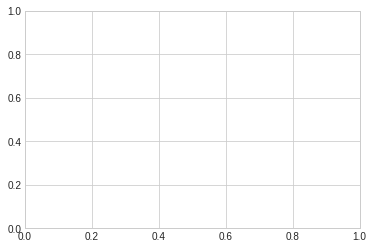

In [5]:
fig = plt.figure()
ax = plt.axes()

En matplotlib, la figura (`figure`) (una instancia de la clas `plt.figure`) puede pensarse como un contenedor para todos los objetos como ejes, graficas, texto y etiquetas.

Una vez creados los ejes (`axes`) podemos usar la función `ax.plot` para graficar datos.

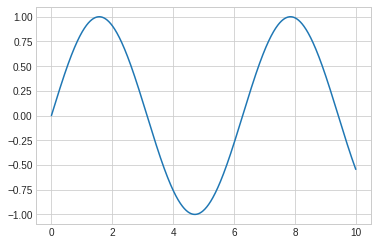

In [6]:
# Crear la figura y los ejes
fig = plt.figure()
ax = plt.axes()

# Creamos un arreglo con 1000 numeros uniformemente distribuidos entre 0 y 10.
# Puede pensar en esto como el dominio de la función, i.e. el intervalo [0, 10]
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));
plt.show()

Si queremos crear una sola figura con multiples gráficas, podemos simplemente llamar la función `plot` varias veces.

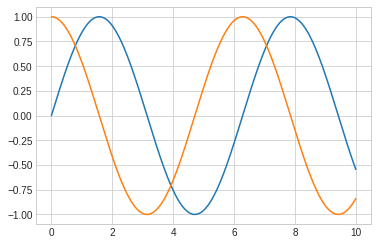

In [7]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));
plt.show()

Matplotlib le permite modificar las figuras agregando más información como título de la gráficas, etiquetar los ejes o las gráficas.

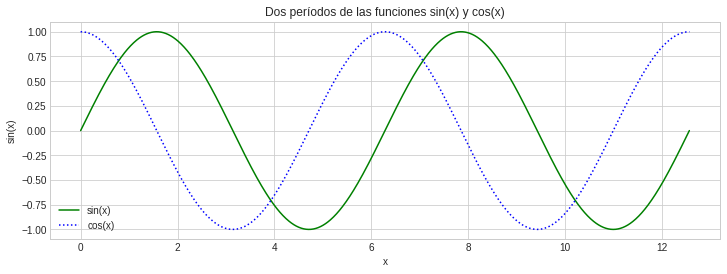

In [8]:
# Puede indicar el tamaño de la figura con el parámetro figsize = (ancho, alto)
fig = plt.figure(figsize=(12, 4))
ax = plt.axes()

x = np.linspace(0, 4 * np.pi, 1000)

# La opción '-g' indica que la linea de la gráfica es continua (-) y de color verde (g)
# label='sin(x)' indica que la linea se etiquetará como 'sin(x)'
ax.plot(x, np.sin(x), '-g', label='sin(x)')
# La opción ':b' indica que la linea de la gráfica es punteada (:) y de color azul (g)
# label='cos(x)' indica que la linea se etiquetará como 'cos(x)'
ax.plot(x, np.cos(x), ':b', label='cos(x)')
plt.title("Dos períodos de las funciones sin(x) y cos(x)") # Título de la gráfica
plt.xlabel("x") # Etiqueta para el eje horizontal
plt.ylabel("sin(x)") # Etiqueta para el eje vertical
plt.legend() # Mostrar las etiquetas de cada plot
plt.show()

## **Scipy** 
<img src="https://docs.scipy.org/doc/scipy/reference/_static/scipyshiny_small.png" width=100px/>

Scipy es una librería que contine módulos para optimización, álgebra lineal, integración, interpolación, funciones especiales, transformada de Fourier, procesamiento de señales y de imágenes, resolución de EDOs y otras tareas para la ciencia e ingeniería.

**Integración**: Para realizar la integral numérica $\displaystyle\int_a^b f(x)dx$ podemos usar la función `quad` que permite integrar una función de una variable entre dos puntos. Los puntos pueden ser `np.inf` para indicar $\infty$.

Por ejemplo suponga que se quiere integrar la función $f(x) = 2x^2 + 3$ en el intervalo $[0, 1]$, i.e.
$$I = \int_0^1 (2x^2 + 3)dx.$$

In [9]:
# Importamos la función quad del modulo integrate de scipy
from scipy.integrate import quad

# Definimos la función que queremos integrar
def integrand(x):
    return 2*x**2 + 3

# El método quad devuelve el resultado de la integral y el error absoluto aproximado
I, e = quad(integrand, 0, 1)

print(f"El resultado de la integral es {I}, calculada con un error aproximado de {e}")

El resultado de la integral es 3.666666666666667, calculada con un error aproximado de 4.0708177569589075e-14


# **Ejercicios**

1. Grafique las funciones $y = \cos \left(  n \pi t \right)$ para $n = 1, 2$ y $3$ en el intervalo $[-\pi, \pi]$, todas en la misma figura de tamaño `figsize=(12, 4)`.

In [10]:
# Resuelva aquí el problema 1








2. Grafique la función $f(t) = \displaystyle\sum_{k= 1}^n (-1)^k \cos (k \pi  t)$ para $n = 1, 2$ y $3$.

In [ ]:
# Resuelva aquí el problema 2

3. Grafique la siguiente función periódica.

$$f(t) = \left\{\begin{array}{ll} -1, & -1 < t < 0 \\ 1, & 0 < t < 1 \end{array} \right.,$$

con período $T = 2$, en el intervalo $[0, 6]$. Note que debe graficar 3 períodos de la función.

In [ ]:
# Resuelva aquí el problema 3

4.
a) Construya una función `producto_interno(f, g)` que calcule el siguiente profucto interno:
$$\langle \, f \, | \, g \,  \rangle = \int_0^1 f(t)g(t) dt$$

b) Las [funciones de Walsh](https://mathworld.wolfram.com/WalshFunction.html) forman un conjunto de funciones ortogonales. Estas funciones son útiles en varias áreas del procesamiento digital de señales.
Las funciones de Walsh toman solamente los valores de $1$ o $-1$ en subintervalos de $[0, 1]$ determinados por [fracciones diádicas](https://es.wikipedia.org/wiki/Racional_di%C3%A1dico). Las primeras cinco funciones de Walsh, $y_0(t), y_1(t),y_2(t),y_3(t), y_4(t)$ y $y_5(t)$ son las siguientes:

<img src="https://github.com/ivan-jgr/computacion-cientifica/blob/main/misc/Walsh_functions.png?raw=true"/>

Escriba las funciones `y0_(t)`, `y1_(t)`, `y2_(t)`, `y3_(t)` y `y4_(t)`.

c) Para una función $f(t)$,  encuentre una *aproximación* de $f(t)$ de la forma
$$\hat{f}(t) =  \sum_{n = 0}^4 \alpha_n y_n(t),$$
en donde $\alpha_n = \dfrac{\langle  f \, | \, y_n \rangle}{\Vert y_n \Vert^2 }.$

d) Escriba una función que grafique (en la misma figura) $x(t)$ y su aproximación $\hat{x}(t)$.

In [ ]:
# Resuelva aquí el problema 4a)
def producto_interno(f, g):
    """
    Función que calcula el producto interno entre f y g
    
    :param f: es una función
    :param g: es una función
    :returns: retorna el producto interno como un float
    """
    pass

In [ ]:
# Importamos la función quad del modulo integrate de scipy
import numpy as np

## Aquí no tiene que hacer nada. Verificamos si su función está bien implementada
# Funciones de ejemplo
f_test = lambda x: x
g_test = lambda x: np.sin(x)*x**2

producto_interno(f_test, g_test)

El resultado al ejecutar la celda anterior debería ser `0.17709857491700906` o similar.

In [ ]:
# Resuelva aqui el problema 4b)
def y0(t):
    """
    Primera función de Walsh
    """
    pass

def y1(t):
    """
    Segunda función de Walsh
    """
    pass

def y2(t):
    """
    Tercera función de Walsh
    """
    pass

def y3(t):
    """
    Cuarta función de Walsh
    """
    pass

def y4(t):
    """
    Quinta función de Walsh
    """
    pass

In [ ]:
## Aquí no tiene que hacer nada. Verificamos si su función está bien implementada

import itertools

# Verificando que las funciones sean ortogonales.
O = [y0, y1, y2, y3, y4]
comb = itertools.combinations(iter(O), 2)
list(map(lambda x: producto_interno(x[0], x[1]), comb))

El resultado que debería obtener al ejecutar la celda anterior es `[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]`.

In [ ]:
## Aquí no tiene que hacer nada. Verificamos si su función está bien implementada

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


t = np.linspace(0, 1, 1000)

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(12, 8)
axs[0, 0].plot(t, [y0(u) for u in t])
axs[0, 0].set_title('$y_0(t)$')

axs[0, 1].plot(t, [y1(u) for u in t], 'tab:orange')
axs[0, 1].set_title('$y_1(t)$')

axs[1, 0].plot(t, [y2(u) for u in t], 'tab:green')
axs[1, 0].set_title('$y_2(t)$')

axs[1, 1].plot(t, [y3(u) for u in t], 'tab:red')
axs[1, 1].set_title('y_3(t)')

axs[2, 0].plot(t, [y4(u) for u in t], 'tab:gray')
axs[2, 0].set_title('y_4(t)')

for ax in axs.flat:
    ax.set(xlabel='t')
    ax.set_ylim(-1.2, 1.3)
    ax.set_yticks([-1, 0, 1])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Asegúrese que las funciones graficadas en la figura anterior corresponda a las funciones de Welsh mostradas en 4b).

In [ ]:
# Resuelva aquí el problema 4c)
def expansion_ortogonal(f, O=[y0, y1, y2, y3, y4]):
    """
    Calcula la aproximación de f como una serie
    :param f: La función que se quiere aproximar
    :param O: es una `list` de funciones. La lista contiene las 5 primeras funciones de Walsh
    :return: una función que es la aproximación de f
    """
    pass

In [ ]:
## Aquí no tiene que hacer nada. Verificamos si su función está bien implementada

f_hat = expansion_ortogonal(lambda x: -x)

# Asegurarse que devolvió una función
assert callable(f_hat), "Debe retornar una función"

t = np.linspace(0, 1, 1000)
plt.plot(t, np.vectorize(f_hat)(t))
plt.show()

La gráfica de la celda anterior debería verse similar a esta:
<img src="https://github.com/ivan-jgr/computacion-cientifica/blob/main/misc/img1_lb1.png?raw=true"/>

In [ ]:
# Resuelva aquí el problema 4d)
def plot_f_and_aprox(f, f_hat):
    """
    Grafica f y su aproximación como serie f_hat para 0 <= t <= 1
    :param f: es la función original
    :param f_hat: es la aproximación de f
    """
    pass

In [ ]:
## Aquí no tiene que hacer nada. Verificamos si su función está bien implementada

# funciones de ejemplo
f_test1 = lambda u: np.sin(np.pi*u)
f_test2 = lambda u: u**2
f_test3 = lambda u: np.sin(2*np.pi*u) + np.cos(np.pi*u)

# Compare las funciones con su aproximación
plot_f_and_aprox(f_test1, expansion_ortogonal(f_test1))
plot_f_and_aprox(f_test2, expansion_ortogonal(f_test2))
plot_f_and_aprox(f_test3, expansion_ortogonal(f_test3))

# **Instrucciones Generales**


1.   Este laboratorio será realizado de manera *individual*.
2.   **Fecha de Entrega:** Jueves 29 de Julio de 2021. Su solución debe subirla en un archivo ZIP enviado por GES y debe contener el archivo `.ipynb` con sus respuesta a cada inciso solicitado en la sección de "*Ejercicios*". 

